<a href="https://colab.research.google.com/github/cesarespgar/proyectos_pandas/blob/main/Proyectotest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data?select=GlobalLandTemperaturesByCountry.csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%cd '/content/drive/My Drive/Colab Notebooks/db'

/content/drive/My Drive/Colab Notebooks/db


In [ ]:
!ls

{}						london_merged.csv
API_AG.LND.AGRI.K2_DS2_en_csv_v2_716226.csv	Meteorite_Landings.csv
API_AG.LND.FRST.K2_DS2_en_csv_v2_716262.csv	poblacion.csv
API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_715482.csv	test.csv
API_EN.ATM.CO2E.KT_DS2_en_csv_v2_713263.csv	test.hdf
API_SP.POP.TOTL_DS2_en_csv_v2_1593924.csv	test.json
API_SP.POP.TOTL_DS2_en_csv_v2_713131.csv	test.parquet
covid_19_data.csv				test.pkl
GlobalLandTemperaturesByCountry.csv		test.xlsx


In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df_temp = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
df_temp

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


In [ ]:
## para medir la BDD
df_temp.shape

(577462, 4)

In [ ]:
df_temp.info

<bound method DataFrame.info of                 dt  AverageTemperature  AverageTemperatureUncertainty   Country
0       1743-11-01               4.384                          2.294     Åland
1       1743-12-01                 NaN                            NaN     Åland
2       1744-01-01                 NaN                            NaN     Åland
3       1744-02-01                 NaN                            NaN     Åland
4       1744-03-01                 NaN                            NaN     Åland
...            ...                 ...                            ...       ...
577457  2013-05-01              19.059                          1.022  Zimbabwe
577458  2013-06-01              17.613                          0.473  Zimbabwe
577459  2013-07-01              17.000                          0.453  Zimbabwe
577460  2013-08-01              19.759                          0.717  Zimbabwe
577461  2013-09-01                 NaN                            NaN  Zimbabwe

[577462

In [ ]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [ ]:
df_temp['Country'].unique()

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecu

In [ ]:
## Convirtiendo nuestra variable 'dt' a otra de tipo Tiempo
df_temp['year'] = pd.to_datetime(df_temp['dt'])
df_temp['year']

0        1743-11-01
1        1743-12-01
2        1744-01-01
3        1744-02-01
4        1744-03-01
            ...    
577457   2013-05-01
577458   2013-06-01
577459   2013-07-01
577460   2013-08-01
577461   2013-09-01
Name: year, Length: 577462, dtype: datetime64[ns]

In [ ]:
## Creando un filtro para dejar solo datos mayores a 1970:
idx = df_temp['year'] > pd.to_datetime('1970-01-01')
df_temp = df_temp[idx]
df_temp

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year
2715,1970-02-01,-10.835,0.478,Åland,1970-02-01
2716,1970-03-01,-1.583,0.608,Åland,1970-03-01
2717,1970-04-01,0.493,0.463,Åland,1970-04-01
2718,1970-05-01,6.939,0.565,Åland,1970-05-01
2719,1970-06-01,14.252,0.676,Åland,1970-06-01
...,...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe,2013-05-01
577458,2013-06-01,17.613,0.473,Zimbabwe,2013-06-01
577459,2013-07-01,17.000,0.453,Zimbabwe,2013-07-01
577460,2013-08-01,19.759,0.717,Zimbabwe,2013-08-01


In [ ]:
## para agrupar por fecha y pais y conseguir sus promedios:
df_t_avg =  df_temp.groupby(['Country',
                 pd.Grouper(key='year', freq='1Y')]).agg({'AverageTemperature':[np.mean, np.median]})
df_t_avg                 

AverageTemperature         
                                     mean   median
Country     year                                  
Afghanistan 1970-12-31          16.005455  16.1990
            1971-12-31          14.823500  14.9340
            1972-12-31          12.547167  13.8725
            1973-12-31          14.235500  14.9130
            1974-12-31          13.316750  13.6160
...                                   ...      ...
Åland       2009-12-31           6.489083   5.5765
            2010-12-31           4.861917   4.7550
            2011-12-31           7.170750   7.4990
            2012-12-31           6.063917   6.2540
            2013-12-31           6.229750   6.0140

[10692 rows x 2 columns]

In [ ]:
## Para elegir un país en particular:
df_t_avg.xs('Mexico')['AverageTemperature']

,mean,median
year,,
1970-12-31,21.036182,21.5130
1971-12-31,20.640333,20.6605
1972-12-31,20.975000,22.1485
1973-12-31,20.496167,20.8200
1974-12-31,20.631500,21.0005
1975-12-31,20.449333,20.9585
1976-12-31,20.145667,20.3740
1977-12-31,20.841250,21.0620
1978-12-31,20.755500,21.2615


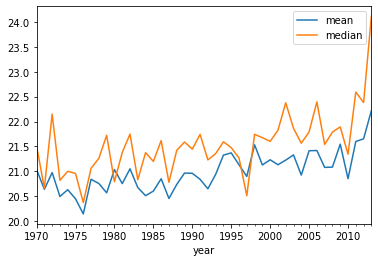

In [ ]:
df_t_avg.xs('Mexico')['AverageTemperature'].plot()

In [ ]:
df_t_med = df_t_avg['AverageTemperature']['median'].reset_index()
df_t_med

,Country,year,median
0,Afghanistan,1970-12-31,16.1990
1,Afghanistan,1971-12-31,14.9340
2,Afghanistan,1972-12-31,13.8725
3,Afghanistan,1973-12-31,14.9130
4,Afghanistan,1974-12-31,13.6160
...,...,...,...
10687,Åland,2009-12-31,5.5765
10688,Åland,2010-12-31,4.7550
10689,Åland,2011-12-31,7.4990
10690,Åland,2012-12-31,6.2540


In [ ]:
## para extraer el año de una fecha o data:
df_t_med['date'] = df_t_med['year'].dt.year
df_t_med['date']

0        1970
1        1971
2        1972
3        1973
4        1974
         ... 
10687    2009
10688    2010
10689    2011
10690    2012
10691    2013
Name: date, Length: 10692, dtype: int64

In [ ]:
## renombrando alguna de las columnas (cambiando 'median' por 'temperature'):
# para evitar siempre escribir 'dataframe=dataframe' usamos inplace=True
df_t_med.rename(columns={'median':'temperature'}, inplace=True)
df_t_med

,Country,year,temperature,date
0,Afghanistan,1970-12-31,16.1990,1970
1,Afghanistan,1971-12-31,14.9340,1971
2,Afghanistan,1972-12-31,13.8725,1972
3,Afghanistan,1973-12-31,14.9130,1973
4,Afghanistan,1974-12-31,13.6160,1974
...,...,...,...,...
10687,Åland,2009-12-31,5.5765,2009
10688,Åland,2010-12-31,4.7550,2010
10689,Åland,2011-12-31,7.4990,2011
10690,Åland,2012-12-31,6.2540,2012


In [ ]:
## creando un boxplot con una tabla pivot:
df_t_pivot = df_t_med.pivot_table(values='temperature', index='date', columns='Country')
df_t_pivot


Country,Afghanistan,Africa,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua And Barbuda,Argentina,Armenia,Aruba,Asia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Baker Island,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,"Bonaire, Saint Eustatius And Saba",Bosnia And Herzegovina,Botswana,Brazil,British Virgin Islands,Bulgaria,Burkina Faso,Burma,Burundi,Cambodia,Cameroon,Canada,Cape Verde,...,South America,South Georgia And The South Sandwich Isla,South Korea,Spain,Sri Lanka,Sudan,Suriname,Svalbard And Jan Mayen,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Timor Leste,Togo,Tonga,Trinidad And Tobago,Tunisia,Turkey,Turkmenistan,Turks And Caicas Islands,Uganda,Ukraine,United Arab Emirates,United Kingdom,United Kingdom (Europe),United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Virgin Islands,Western Sahara,Yemen,Zambia,Zimbabwe,Åland
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1970,16.1990,25.2360,12.4230,23.2840,26.7180,11.6390,22.9640,27.1510,27.2240,15.1150,11.1180,28.6180,8.6480,21.9360,6.3550,12.4300,25.6190,27.4460,25.5650,27.9370,27.0110,6.5360,10.6590,26.4620,27.0670,13.1690,21.9350,28.3010,10.0870,23.4400,25.4440,26.7220,11.5200,28.1070,25.7410,19.9750,27.1040,24.4220,-1.6320,24.7480,...,22.6690,1.2720,14.4880,13.7550,27.6430,28.3390,26.4830,-5.8620,19.2560,3.2700,7.4020,19.4770,24.2230,6.4740,22.3660,26.8520,26.8290,27.0600,23.6180,26.4450,20.1740,12.9030,17.4190,26.8910,22.8360,10.0670,28.9860,9.7340,9.9730,8.2860,15.7640,15.5410,25.2780,24.6330,26.7220,23.8210,27.4390,22.1330,23.2560,6.9340
1971,14.9340,24.7755,11.6735,22.7810,26.4845,11.9275,22.4615,26.5295,26.3810,14.7665,8.6390,28.0850,8.1845,22.2985,7.1385,10.7060,25.4960,25.5135,25.3280,26.3180,26.4790,5.7755,10.0065,25.2630,26.9295,12.6415,21.2455,27.2900,10.1885,23.9550,24.9120,26.2470,9.5820,27.9310,24.7345,19.6260,27.0150,24.0725,-3.4755,23.6530,...,21.9110,1.5420,11.9565,12.6455,27.1535,27.9145,25.8920,-10.5280,19.5295,1.6720,8.5215,17.1220,22.1795,5.8390,22.3920,26.6300,26.4135,26.3805,23.8420,26.0095,19.6470,10.6395,14.9685,26.7755,22.7355,7.4325,27.8175,8.7785,8.9780,8.7545,16.5470,12.9860,24.6480,24.1105,26.2470,20.2715,26.5130,21.8265,22.7055,4.4870
1972,13.8725,25.1230,11.2175,22.4985,26.8205,10.0250,22.6070,26.9150,26.7700,14.3445,11.4950,28.6780,8.6445,22.3470,5.3755,13.6880,25.8145,26.3535,26.0285,26.9035,27.0225,6.0925,8.7840,25.8145,26.7025,12.5800,21.9525,27.8050,9.7260,23.0225,25.1430,26.6150,10.6495,28.2305,25.4830,20.0425,27.2160,24.1850,-6.6775,23.6670,...,22.3110,0.4455,12.5585,12.2105,27.4820,28.9775,26.1590,-5.9665,19.9670,2.2865,6.1615,19.4300,23.0640,4.9110,22.6910,26.9205,26.2535,27.0445,23.2235,26.4690,18.6385,13.2440,16.3415,27.1115,23.2850,9.0295,28.0485,8.6235,8.7990,8.2290,16.9190,13.5640,25.2615,24.5165,26.6150,21.3905,26.8175,21.9800,22.3980,5.6200
1973,14.9130,25.3445,11.8370,22.9975,27.0120,9.5525,23.0730,27.3360,27.1725,14.8675,9.7335,28.1630,8.5830,22.9775,4.5905,11.8825,25.5835,27.0690,25.9215,27.1555,26.8725,5.7910,8.0960,26.4840,27.3385,13.5435,22.4190,27.7220,9.3100,23.6135,25.2795,27.0685,10.5565,28.4860,25.4180,20.2410,27.4025,24.6665,-3.6645,24.5360,...,22.4800,1.6770,12.8265,12.3910,27.5945,28.6225,26.4350,-9.6135,18.8930,0.4795,5.1230,18.9260,23.2600,5.5885,22.7820,26.9290,27.0445,26.9310,23.9020,26.4575,19.6385,12.1315,15.8780,26.8120,23.0450,8.5070,28.7285,7.4480,7.5175,8.8785,17.5420,13.4735,25.2020,25.0080,27.0685,22.9215,27.2265,22.1090,22.5815,3.5795
1974,13.6160,24.8260,11.3210,21.5795,26.6350,8.2045,22.3275,26.6015,26.5190,15.2160,9.3265,27.7935,8.3875,21.6105,5.1555,11.6075,25.2450,26.3585,25.4955,27.2765,26.7885,6.1085,8.3310,25.6020,26.7790,14.0195,21.2395,27.3970,8.3580,22.0050,24.7665,26.1720,10.4035,27.0055,25.5345,19.8995,27.2265,24.0195,-6.0400,23.3540,...,21.8890,1.4885,12.2490,10.8630,27.2295,28.1990,25.8925,-7.0340,19.3190,2.4690,5.4260,19.1350,22.9360,5.6675,22.3410,26.7550,26.4965,26.4465,23.8720,26

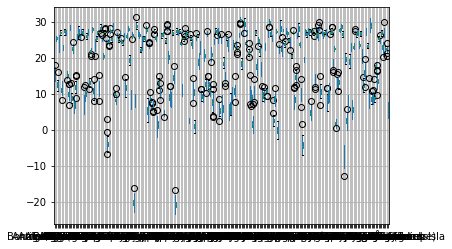

In [ ]:
## realizando boxplot
df_t_pivot.boxplot()

In [ ]:
## para seleccionar filas aleatorias:
df_t_pivot.sample(2)

Country,Afghanistan,Africa,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua And Barbuda,Argentina,Armenia,Aruba,Asia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Baker Island,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,"Bonaire, Saint Eustatius And Saba",Bosnia And Herzegovina,Botswana,Brazil,British Virgin Islands,Bulgaria,Burkina Faso,Burma,Burundi,Cambodia,Cameroon,Canada,Cape Verde,...,South America,South Georgia And The South Sandwich Isla,South Korea,Spain,Sri Lanka,Sudan,Suriname,Svalbard And Jan Mayen,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Timor Leste,Togo,Tonga,Trinidad And Tobago,Tunisia,Turkey,Turkmenistan,Turks And Caicas Islands,Uganda,Ukraine,United Arab Emirates,United Kingdom,United Kingdom (Europe),United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Virgin Islands,Western Sahara,Yemen,Zambia,Zimbabwe,Åland
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010,17.4285,26.1595,12.6825,25.4575,27.326,11.4400,23.0795,27.8365,27.6700,14.911,10.380,28.983,9.292,22.8570,6.5825,12.4060,25.5405,28.6650,25.9590,27.975,27.8335,6.5175,9.9740,26.1025,27.9585,14.120,22.3840,28.5635,10.4040,24.6665,26.122,27.5365,11.0505,28.7360,25.942,21.0325,27.7620,25.0005,-0.5750,25.5675,...,22.8585,2.973,12.038,13.9145,28.0610,29.3295,27.2295,-6.9995,20.1955,2.8540,7.639,20.6380,22.6125,7.2945,23.6685,27.3915,26.881,27.7085,23.7675,27.5575,21.0155,12.6085,17.4685,27.333,23.8330,8.8855,30.570,8.9375,9.0460,10.2315,17.154,15.0755,25.9715,24.881,27.5365,24.2365,28.295,22.6880,23.304,4.755
1985,14.8955,24.9255,12.6220,23.3455,26.804,11.2395,22.9350,26.9935,26.7665,14.851,9.589,28.027,8.604,22.1965,6.5250,11.4595,26.0330,26.5245,25.7155,27.231,26.7695,6.8900,9.7155,25.6225,27.4820,13.507,21.8845,27.4385,10.5455,23.6740,25.357,26.5675,10.7890,27.7515,25.298,20.2170,27.1505,24.2720,-5.1105,24.3275,...,22.3895,1.783,13.232,13.2890,27.4085,28.4740,26.1560,-9.4110,20.1825,1.9995,7.613,18.2035,22.8485,6.1065,22.5400,26.6820,26.768,27.2585,23.2565,26.3285,20.0520,11.5795,15.4840,27.188,23.1115,8.2485,27.909,8.5780,8.7565,9.0720,17.400,13.2645,24.9395,24.264,26.5675,21.7620,26.162,22.4485,22.445,3.872


In [ ]:
df_t_pivot.T.sample(2)

date,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Mali,30.703,29.8805,30.5730,30.655,29.510,30.3795,29.655,30.7145,30.1015,30.5105,30.5625,31.087,30.5505,31.2065,30.8740,30.2165,30.488,31.1225,30.6435,30.4135,31.433,30.4845,30.4650,30.9715,29.606,30.889,30.5715,30.6145,30.9905,30.1005,30.5885,30.7610,30.67,30.819,31.1675,31.2020,30.5695,30.5070,30.722,31.0285,30.6990,30.9005,29.7285,31.107
Spain,13.755,12.6455,12.2105,12.391,10.863,12.3570,11.483,13.0735,12.1645,12.3045,12.5635,13.177,12.9710,13.2070,12.6025,13.2890,12.769,13.7255,13.6760,14.0085,13.115,11.8620,12.7425,11.9005,13.605,15.011,13.6520,15.3555,13.1095,13.9690,12.7670,14.4395,13.81,13.434,13.1715,14.3425,15.3635,13.8195,13.693,14.3375,13.9145,16.0565,13.1825,13.196


In [ ]:
df_t_pivot.T.sample(2).T.head(4)

Country,Seychelles,Uzbekistan
date,,
1970,26.7140,15.5410
1971,26.2440,12.9860
1972,26.8415,13.5640
1973,27.0735,13.4735


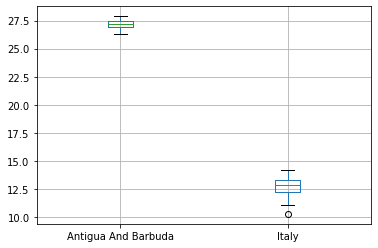

In [ ]:
df_t_pivot.T.sample(2).T.boxplot()

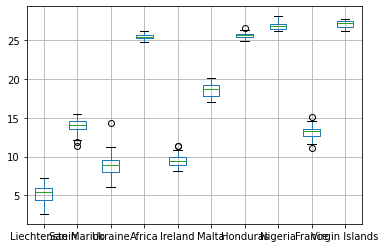

In [ ]:
df_t_pivot.T.sample(10).T.boxplot()

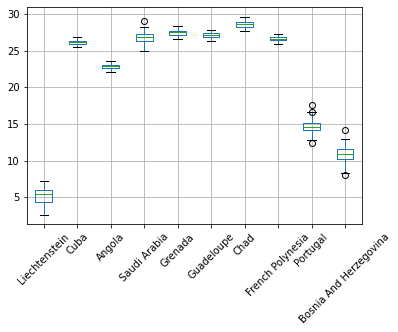

In [ ]:
df_t_pivot.T.sample(10).T.boxplot(rot=45)

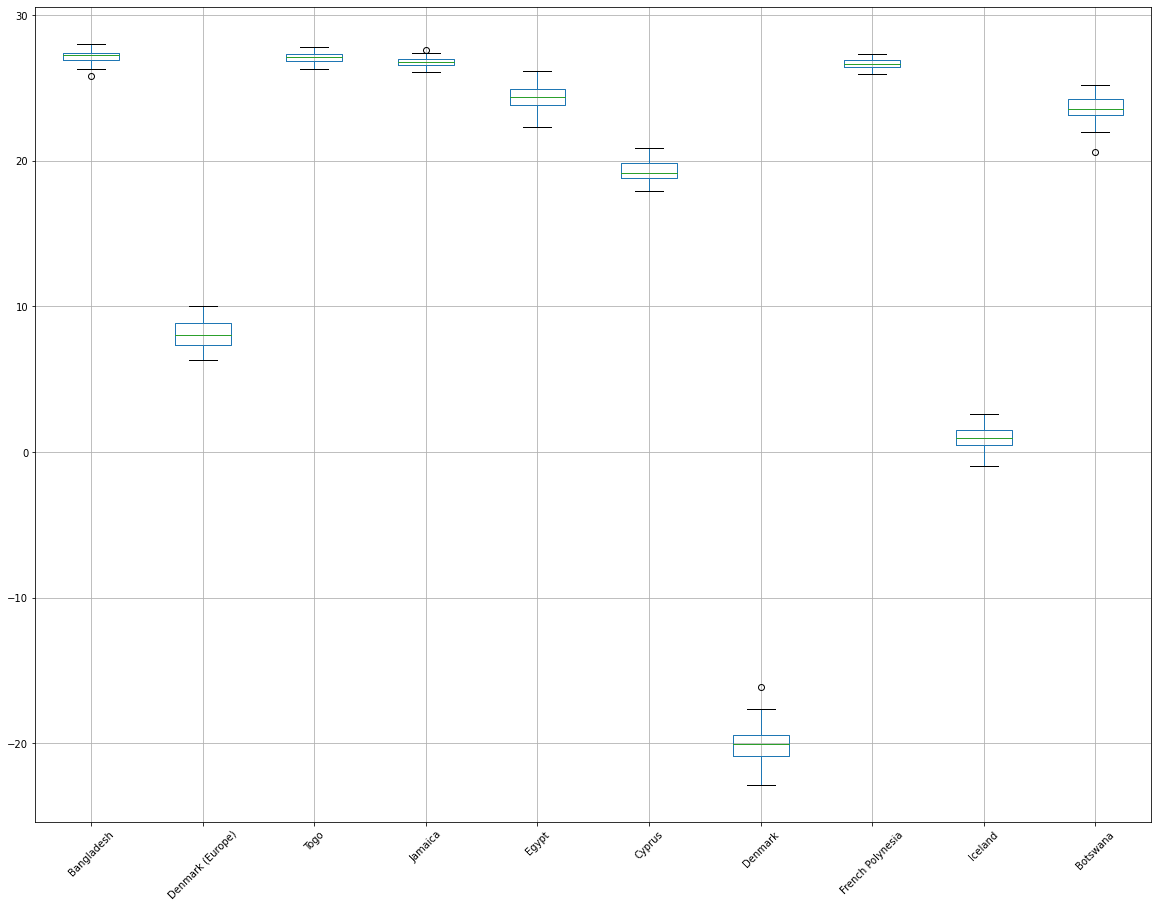

In [ ]:
# para modificar el tamaño del grafico:
df_t_pivot.T.sample(10).T.boxplot(rot=45, figsize=(20,15))

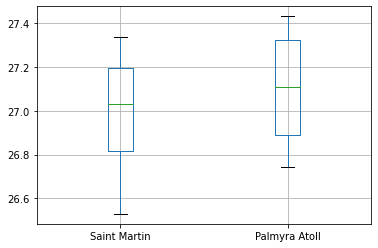

In [ ]:
df_t_pivot.T.sample(2).T.head(4).boxplot()

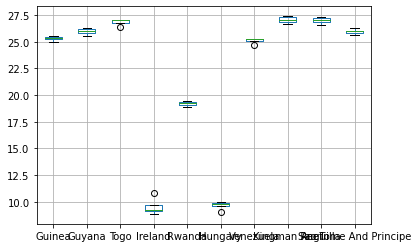

In [ ]:
df_t_pivot.T.sample(10).T.head(4).boxplot()

In [ ]:
# para corregir numeros apiñados:
df_t_pivot.T.sample(10).T.head(4).boxplot(rot=45)

**CLASE 28 - REPASO**

In [ ]:
df_agri = pd.read_csv('API_AG.LND.AGRI.K2_DS2_en_csv_v2_716226.csv', header = 2)
df_fore = pd.read_csv('API_AG.LND.FRST.K2_DS2_en_csv_v2_716262.csv', header = 2)
df_elec = pd.read_csv('API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_715482.csv', header = 2)
df_co2e = pd.read_csv('API_EN.ATM.CO2E.KT_DS2_en_csv_v2_713263.csv', header = 2)
df_popu = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_713131.csv', header = 2)

In [ ]:
df_popu

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,58726.0,59063.0,59440.0,59840.0,60243.0,60528.0,60657.0,60586.0,60366.0,60103.0,59980.0,60096.0,60567.0,61345.0,62201.0,62836.0,63026.0,62644.0,61833.0,61079.0,61032.0,62149.0,64622.0,68235.0,72504.0,76700.0,80324.0,83200.0,85451.0,87277.0,89005.0,90853.0,92898.0,94992.0,97017.0,98737.0,100031.0,100834.0,101222.0,101358.0,101455.0,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,NaN,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,10174836.0,10399926.0,10637063.0,10893776.0,11173642.0,11475445.0,11791215.0,12108963.0,12412950.0,12689160.0,12943093.0,13171306.0,13341198.0,13411056.0,13356511.0,13171673.0,12882528.0,12537730.0,12204292.0,11938208.0,11736179.0,11604534.0,11618005.0,11868877.0,12412308.0,13299017.0,14485546.0,15816603.0,17075727.0,18110657.0,18853437.0,19357126.0,19737765.0,20170844.0,20779953.0,21606988.0,22600770.0,23680871.0,24726684.0,25654277.0,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,NaN,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,5781214.0,5774243.0,5771652.0,5803254.0,5890365.0,6040777.0,6248552.0,6496962.0,6761380.0,7024000.0,7279509.0,7533735.0,7790707.0,8058067.0,8341289.0,8640446.0,8952950.0,9278096.0,9614754.0,9961997.0,10320111.0,10689250.0,11068050.0,11454777.0,11848386.0,12248901.0,12657366.0,13075049.0,13503747.0,13945206.0,14400719.0,14871570.0,15359601.0,15866869.0,16395473.0,16945753.0,17519417.0,18121479.0,18758145.0,19433602.0,20149901.0,20905363.0,21695634.0,22514281.0,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,NaN,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,2081695.0,2135479.0,2187853.0,2243126.0,2296752.0,2350124.0,2404831.0,2458526.0,2513546.0,2566266.0,2617832.0,2671997.0,2726056.0,2784278.0,2843960.0,2904429.0,2964762.0,3022635.0,3083605.0,3142336.0,3227943.0,3286542.0,3266790.0,3247039.0,3227287.0,3207536.0,3187784.0,3168033.0,3148281.0,3128530.0,3108778.0,3089027.0,3060173.0,3051010.0,3039616.0,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,NaN,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,21890.0,23058.0,24276.0,25559.0,26892.0,28232.0,29520.0,30705.0,31777.0,32771.0,33737.0,34818.0,36067.0,37500.0,39114.0,40867.0,42706.0,44600.0,46517.0,48455.0,50434.0,52448.0,54509.0,56671.0,58888.0,60971.0,62677.0,63850.0,64360.0,64327.0,64142.0,64370.0,65390.0,67341.0,70049.0,73182.0,76244.0,78867.0,80993.0,82684.0,83862.0,84463.0,84449.0,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,1106000.0,1135000.0,1163000.0,1191000.0,1219000.0,1247000.0,1278000.0,1308000.0,1339000.0,1369000.0,1400000.0,1430000.0,1460000.0,1491000.0,1521000.0,1552000.0,1582000.0,1614000.

In [ ]:
## dandole formato a nuevos df para encajar con dfs anteriores (mapeando rango creado)
# seleccionando las columnas deseadas
range(1971, 2015)
map(str, range(1971, 2015))
cols = ['Country Name', 'Country Code'] + list(map(str, range(1971, 2015)))
cols[:5]

['Country Name', 'Country Code', '1971', '1972', '1973']

In [ ]:
list(map(str, range(1971, 2015)))

['1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014']

In [ ]:
df_agri.loc[:,cols]

,Country Name,Country Code,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Aruba,ABW,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
1,Afghanistan,AFG,380360.0,380460.0,380480.0,380480.0,380480.0,380480.0,380500.0,380500.0,380490.0,380490.0,380530.0,380540.0,380540.0,380540.0,380540.0,380540.0,380450.0,380400.0,380400.0,380400.0,380300.0,380300.0,379340.0,378130.0,377530.0,377520.0,377900.0,378670.0,377530.0,377530.0,377530.0,377530.000000,379100.000000,379110.000000,379100.000000,379100.000000,379100.000000,379100.000000,379100.000000,379110.000000,379100.000000,379100.000000,379100.000000,379100.000000
2,Angola,AGO,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574040.0,574500.0,575000.0,575000.0,575000.0,575000.0,575000.0,575000.0,575000.0,574000.0,573000.0,573000.0,573900.000000,575900.000000,575900.000000,575900.000000,575900.000000,576900.000000,576900.000000,582900.000000,583900.000000,589900.000000,589900.000000,591900.000000,591900.000000
3,Albania,ALB,12000.0,11740.0,11460.0,11220.0,10800.0,10750.0,11090.0,11140.0,11170.0,11180.0,11160.0,11140.0,11100.0,11130.0,11120.0,11110.0,11110.0,11170.0,11100.0,11210.0,11270.0,11270.0,11260.0,11260.0,11270.0,11310.0,11350.0,11390.0,11450.0,11440.0,11390.0,11400.000000,11210.000000,11220.000000,10770.000000,11200.000000,11190.000000,11810.000000,12013.000488,12013.000488,12010.000000,12013.000488,11873.000488,11742.900391
4,Andorra,AND,250.0,250.0,240.0,240.0,240.0,230.0,230.0,230.0,230.0,230.0,230.0,230.0,230.0,230.0,230.0,230.0,230.0,230.0,230.0,230.0,230.0,230.0,230.0,230.0,230.0,230.0,230.0,230.0,230.0,230.0,227.5,228.500004,228.600006,228.099995,217.999992,217.800007,207.700005,207.600002,207.700005,197.700005,197.700005,187.600002,188.099995,188.099995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5700.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,"Yemen, Rep.",YEM,234260.0,234370.0,234420.0,234470.0,234600.0,234600.0,234600.0,234620.0,234630.0,234630.0,234650.0,234650.0,234650.0,234650.0,234700.0,234700.0,234790.0,234790.0,234810.0,236260.0,236310.0,234810.0,237250.0,237300.0,237360.0,237550.0,237200.0,236800.0,236680.0,236690.0,235950.0,236560.000000,234950.000000,235570.000000,235230.000000,236270.000000,236270.000000,235170.000000,234520.000000,235790.000000,234520.000000,235500.000000,235460.000000,235460.000000
261,South Africa,ZAF,953900.0,951950.0,949900.0,948050.0,945850.0,943820.0,943200.0,942800.0,942100.0,941600.0,941000.0,940330.0,940330.0,940330.0,940330.0,944000.0,946500.0,949000.0,953000.0,956000.0,960050.0,964730.0,969360.0,972650.0,975200.0,978900.0,979450.0,979880.0,980580.0,981250.0,980130.0,980280.000000,979280.000000,976080.000000,974830.000000,968880.000000,968900.000000,971080.000000,969880.000000,968910.000000,963740.000000,968410.000000,968410.000000,968410.000000
262,Zambia,ZMB,200530.0,202510.0,201440.0,202020.0,202370.0,204100.0,202740.0,201550.0,197800.0,198460.0,198360.0,198080.0,199610.0,199820.0,201250.0,202250.0,203660.0,205290.0,208970.0,208110.0,208260.0,210650.0,212020.0,214730.0,214580.0,218650.0,219710.0,220250.0,224050.0,224980.0,225550.0,226160.000000,229090.000000,228970.000000,227620.000000,230480.000000,229840.000000

In [ ]:
## para volver esas columnas como parte de un DFrame usando .melt (las columnas de años se convierten a filas)
df_agri.loc[:,cols].melt(id_vars=['Country Name','Country Code'])

,Country Name,Country Code,variable,value
0,Aruba,ABW,1971,20.0
1,Afghanistan,AFG,1971,380360.0
2,Angola,AGO,1971,574000.0
3,Albania,ALB,1971,12000.0
4,Andorra,AND,1971,250.0
...,...,...,...,...
11611,Kosovo,XKX,2014,NaN
11612,"Yemen, Rep.",YEM,2014,235460.0
11613,South Africa,ZAF,2014,968410.0
11614,Zambia,ZMB,2014,238360.0


In [ ]:
df_agri.loc[:,cols].melt(id_vars=['Country Name','Country Code']).rename(
    columns={'variable':'date',
             'Country Name':'Country',
             'Country Code':'name',
             'value':'agriculture'})

,Country,name,date,agriculture
0,Aruba,ABW,1971,20.0
1,Afghanistan,AFG,1971,380360.0
2,Angola,AGO,1971,574000.0
3,Albania,ALB,1971,12000.0
4,Andorra,AND,1971,250.0
...,...,...,...,...
11611,Kosovo,XKX,2014,NaN
11612,"Yemen, Rep.",YEM,2014,235460.0
11613,South Africa,ZAF,2014,968410.0
11614,Zambia,ZMB,2014,238360.0


In [ ]:
## replicando lo anterior con los demás dataframes aplicando funcion dado que
# dframes de worldbank tienen mismo formato
def fun_formato(df, col = 'agriculture'):
  return df.loc[:,cols].melt(id_vars=['Country Name','Country Code']).rename(
    columns={'variable':'date',
             'Country Name':'Country',
             'Country Code':'name',
             'value':col})

In [ ]:
df_agri = fun_formato(df_agri, col='agriculture')
df_fore = fun_formato(df_fore, col='forest')
df_elec = fun_formato(df_elec, col='electricprod')
df_co2e = fun_formato(df_co2e, col='co2')
df_popu = fun_formato(df_popu, col='population')
df_popu

,Country,name,date,population
0,Aruba,ABW,1971,59440.0
1,Afghanistan,AFG,1971,11475445.0
2,Angola,AGO,1971,6040777.0
3,Albania,ALB,1971,2187853.0
4,Andorra,AND,1971,25559.0
...,...,...,...,...
11611,Kosovo,XKX,2014,1821800.0
11612,"Yemen, Rep.",YEM,2014,25823485.0
11613,South Africa,ZAF,2014,54545991.0
11614,Zambia,ZMB,2014,15399753.0


In [ ]:
df_t_med

,Country,year,temperature,date
0,Afghanistan,1970-12-31,16.1990,1970
1,Afghanistan,1971-12-31,14.9340,1971
2,Afghanistan,1972-12-31,13.8725,1972
3,Afghanistan,1973-12-31,14.9130,1973
4,Afghanistan,1974-12-31,13.6160,1974
...,...,...,...,...
10687,Åland,2009-12-31,5.5765,2009
10688,Åland,2010-12-31,4.7550,2010
10689,Åland,2011-12-31,7.4990,2011
10690,Åland,2012-12-31,6.2540,2012


In [ ]:
## Juntando dos dataframes de similar composición:
df_merge = pd.merge(df_t_med[['Country','temperature','date']],
                    df_popu, on = ['Country','date'], how = 'inner')

ValueError: ignored

In [ ]:
df_popu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11616 entries, 0 to 11615
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     11616 non-null  object 
 1   name        11616 non-null  object 
 2   date        11616 non-null  object 
 3   population  11501 non-null  float64
dtypes: float64(1), object(3)
memory usage: 363.1+ KB


In [ ]:
## cambiando 'date' a int:
df_popu['date'] = df_popu['date'].astype(float)
df_fore['date'] = df_fore['date'].astype(float)
df_agri['date'] = df_agri['date'].astype(float)
df_elec['date'] = df_elec['date'].astype(float)
df_co2e['date'] = df_co2e['date'].astype(float)
df_popu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11616 entries, 0 to 11615
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     11616 non-null  object 
 1   name        11616 non-null  object 
 2   date        11616 non-null  float64
 3   population  11501 non-null  float64
dtypes: float64(2), object(2)
memory usage: 363.1+ KB


In [ ]:
df_merge = pd.merge(df_t_med[['Country','temperature','date']],
                    df_popu, on = ['Country','date'], how = 'inner')

In [ ]:
df_merge

,Country,temperature,date,name,population
0,Afghanistan,14.9340,1971,AFG,11475445.0
1,Afghanistan,13.8725,1972,AFG,11791215.0
2,Afghanistan,14.9130,1973,AFG,12108963.0
3,Afghanistan,13.6160,1974,AFG,12412950.0
4,Afghanistan,13.5130,1975,AFG,12689160.0
...,...,...,...,...,...
7219,Zimbabwe,22.4860,2009,ZWE,12526968.0
7220,Zimbabwe,23.3040,2010,ZWE,12697723.0
7221,Zimbabwe,22.9420,2011,ZWE,12894316.0
7222,Zimbabwe,23.0455,2012,ZWE,13115131.0


In [ ]:
## repitiendo lo mismo con los otros dframes:
df_merge = pd.merge(df_merge,
                    df_co2e,
                    on = ['Country','name','date'],
                    how = 'inner')

df_merge = pd.merge(df_merge,
                    df_elec,
                    on = ['Country','name','date'],
                    how = 'inner')

df_merge = pd.merge(df_merge,
                    df_agri,
                    on = ['Country','name','date'],
                    how = 'inner')

df_merge = pd.merge(df_merge,
                    df_fore,
                    on = ['Country','name','date'],
                    how = 'inner')

df_merge

,Country,temperature,date,name,population,co2,electricprod,agriculture,forest
0,Afghanistan,14.9340,1971,AFG,11475445.0,1895.839,NaN,380360.0,NaN
1,Afghanistan,13.8725,1972,AFG,11791215.0,1532.806,NaN,380460.0,NaN
2,Afghanistan,14.9130,1973,AFG,12108963.0,1639.149,NaN,380480.0,NaN
3,Afghanistan,13.6160,1974,AFG,12412950.0,1917.841,NaN,380480.0,NaN
4,Afghanistan,13.5130,1975,AFG,12689160.0,2126.860,NaN,380480.0,NaN
...,...,...,...,...,...,...,...,...,...
7219,Zimbabwe,22.4860,2009,ZWE,12526968.0,5603.176,585.456912,163000.0,159510.000000
7220,Zimbabwe,23.3040,2010,ZWE,12697723.0,7777.707,606.644199,162000.0,156240.000000
7221,Zimbabwe,22.9420,2011,ZWE,12894316.0,9563.536,636.249337,164000.0,153115.996094
7222,Zimbabwe,23.0455,2012,ZWE,13115131.0,7792.375,608.762505,162000.0,149992.001953


In [ ]:
df_merge.dropna()

,Country,temperature,date,name,population,co2,electricprod,agriculture,forest
62,Albania,13.4490,1990,ALB,3286542.0,5515.168,552.252185,11210.0,7887.999878
63,Albania,11.5885,1991,ALB,3266790.0,4286.723,418.453589,11270.0,7868.499756
64,Albania,13.5850,1992,ALB,3247039.0,2515.562,453.644074,11270.0,7849.000244
65,Albania,13.6500,1993,ALB,3227287.0,2335.879,536.363825,11260.0,7829.500122
66,Albania,13.2390,1994,ALB,3207536.0,1925.175,596.407959,11260.0,7810.000000
...,...,...,...,...,...,...,...,...,...
7219,Zimbabwe,22.4860,2009,ZWE,12526968.0,5603.176,585.456912,163000.0,159510.000000
7220,Zimbabwe,23.3040,2010,ZWE,12697723.0,7777.707,606.644199,162000.0,156240.000000
7221,Zimbabwe,22.9420,2011,ZWE,12894316.0,9563.536,636.249337,164000.0,153115.996094
7222,Zimbabwe,23.0455,2012,ZWE,13115131.0,7792.375,608.762505,162000.0,149992.001953


In [ ]:
df_climate = df_merge.dropna()

In [ ]:
## Países que producen más Co2?
df_climate.groupby('Country')['co2'].median().sort_values(ascending=False)

Country
North America    5.886300e+06
United States    5.382124e+06
China            3.668918e+06
Japan            1.202083e+06
India            1.047706e+06
                     ...     
Haiti            1.651984e+03
Mozambique       1.584144e+03
Togo             1.285284e+03
Niger            7.847380e+02
Eritrea          6.142225e+02
Name: co2, Length: 120, dtype: float64

In [ ]:
## cambiando notación cientifica
pd.set_option('display.float_format', '{:,.1f}'.format)

In [ ]:
df_climate.groupby('Country')['co2'].median().sort_values(ascending=False)

Country
North America   5,886,299.6
United States   5,382,123.7
China           3,668,917.8
Japan           1,202,082.9
India           1,047,705.9
                    ...    
Haiti               1,652.0
Mozambique          1,584.1
Togo                1,285.3
Niger                 784.7
Eritrea               614.2
Name: co2, Length: 120, dtype: float64

In [ ]:
## haciendo un scatterplot:
first_10 = df_climate.groupby('Country')['co2'].median().sort_values(ascending=False).head(10).index
first_10

Index(['North America', 'United States', 'China', 'Japan', 'India', 'Germany',
       'United Kingdom', 'Canada', 'Italy', 'Mexico'],
      dtype='object', name='Country')

In [ ]:
df_max_co2 = df_climate[df_climate['Country'].isin(['United States', 'China', 'Japan', 'India', 'Germany',
       'United Kingdom', 'Canada', 'Italy', 'Mexico'])]
      
df_max_co2

,Country,temperature,date,name,population,co2,electricprod,agriculture,forest
1266,Canada,-4.6,1990,CAN,"27,691,138.0","435,181.2","16,167.4","677,680.0","3,482,730.0"
1267,Canada,-4.2,1991,CAN,"28,037,420.0","426,780.1","16,181.6","677,530.0","3,482,259.1"
1268,Canada,-5.0,1992,CAN,"28,371,264.0","440,978.8","16,164.4","678,140.0","3,481,788.1"
1269,Canada,-4.0,1993,CAN,"28,684,764.0","445,580.8","16,320.1","678,740.0","3,481,316.9"
1270,Canada,-3.4,1994,CAN,"29,000,663.0","456,849.5","16,388.3","679,340.0","3,480,845.9"
...,...,...,...,...,...,...,...,...,...
7004,United States,8.4,2009,USA,"306,771,529.0","5,263,505.5","12,913.7","4,099,606.9","3,079,274.1"
7005,United States,10.2,2010,USA,"309,326,085.0","5,395,532.1","13,394.9","4,084,261.9","3,087,200.0"
7006,United States,9.5,2011,USA,"311,580,009.0","5,289,680.5","13,246.0","4,046,693.1","3,089,950.0"
7007,United States,9.9,2012,USA,"313,874,218.0","5,119,436.4","12,964.3","4,087,065.0","3,092,700.0"


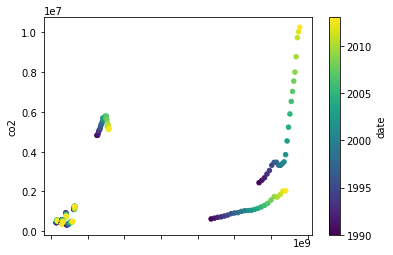

In [ ]:
## construyendo Scatterplot
df_max_co2.set_index('Country').plot.scatter(
    x='population',
    y='co2',
    c='date',
    colormap='viridis'
)

In [ ]:
## hallando la correlacion
df_climate.corr()

,temperature,date,population,co2,electricprod,agriculture,forest
temperature,1.0,0.0,-0.0,-0.2,-0.4,-0.1,-0.1
date,0.0,1.0,0.0,0.0,0.1,-0.0,-0.0
population,-0.0,0.0,1.0,0.6,-0.0,0.6,0.4
co2,-0.2,0.0,0.6,1.0,0.2,0.8,0.7
electricprod,-0.4,0.1,-0.0,0.2,1.0,0.1,0.2
agriculture,-0.1,-0.0,0.6,0.8,0.1,1.0,0.7
forest,-0.1,-0.0,0.4,0.7,0.2,0.7,1.0


In [ ]:
## importando librerias de graficas:
import seaborn as sns

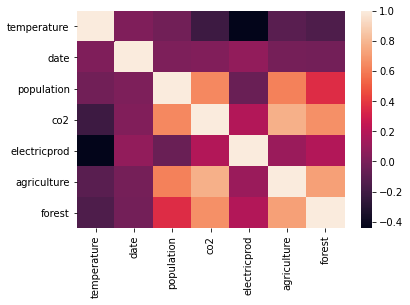

In [ ]:
sns.heatmap(df_climate.corr())

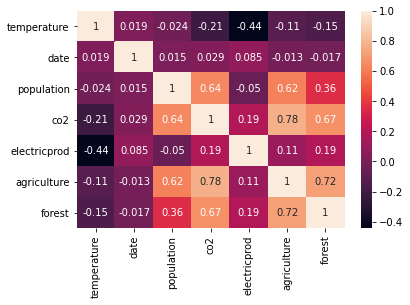

In [ ]:
sns.heatmap(df_climate.corr(), annot=True)

In [ ]:
## eliminando variable país y analizando todos los datos como uno solo (por la variedad de paises la corr entre temperatura y estos era dificil de medir por cantidad de datos variados)
df_med = df_climate.groupby('date').median()
df_med

,temperature,population,co2,electricprod,agriculture,forest
date,,,,,,
1990,22.7,"10,213,863.0","31,363.9","1,114.7","90,195.0","54,005.0"
1991,22.4,"10,346,663.5","27,343.0","1,072.5","91,870.0","60,307.5"
1992,19.9,"9,188,305.5","26,420.7","1,451.8","89,700.0","45,621.0"
1993,20.6,"9,951,683.5","28,267.1","1,520.3","89,890.0","44,579.0"
1994,20.7,"9,991,525.0","29,640.4","1,576.8","89,150.0","42,572.0"
1995,20.1,"10,026,176.0","29,090.3","1,578.3","81,080.0","41,640.0"
1996,20.2,"10,063,945.0","30,670.8","1,687.1","79,870.0","41,270.0"
1997,20.4,"10,108,977.0","30,623.1","1,762.4","80,120.0","41,270.0"
1998,21.5,"10,069,000.0","31,675.5","1,807.3","80,550.0","40,834.0"


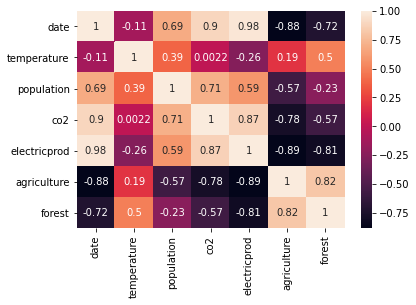

In [ ]:
sns.heatmap(df_med.reset_index().corr(),annot=True)

In [ ]:
## analizando lo mismo pero con matices de descarga:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb1464e7400>,
      dtype=object)

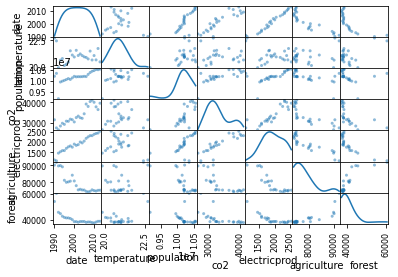

In [ ]:
scatter_matrix(df_med.reset_index(),diagonal='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb1466f7c18>,
      dtype=object)

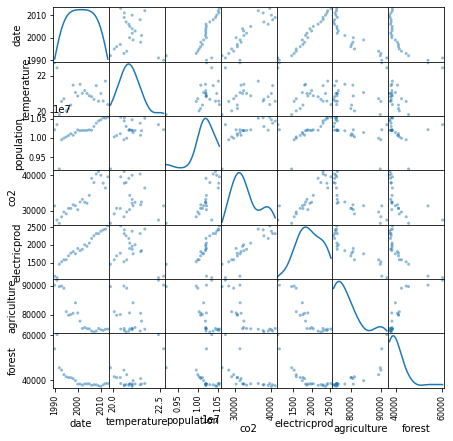

In [ ]:
scatter_matrix(df_med.reset_index(),diagonal='kde', figsize=(7,7))

In [ ]:
## Graficos de coordenadas paralelas:
from pandas.plotting import parallel_coordinates

In [ ]:
df_samerica = df_climate[
df_climate['Country'].isin(['Colombia','Argentina','Bolivia','Mexico','Peru','Chile'])                         
][['Country','temperature','co2','agriculture','forest']]

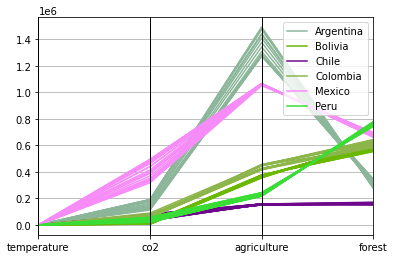

In [ ]:
parallel_coordinates(df_samerica, 'Country')

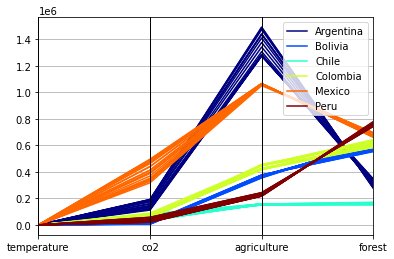

In [ ]:
parallel_coordinates(df_samerica, 'Country', colormap='jet')